In [58]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [16]:
data = load_boston().data
data = pd.DataFrame(data=data, columns=load_boston().feature_names)
data['PRICE'] = load_boston().target


Skewness of simple data  1.1080984082549072


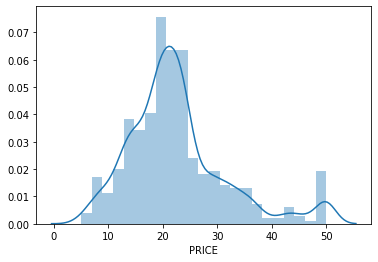

Skewness of log data  -0.33032129530987864


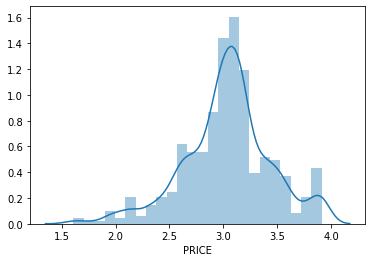

In [28]:
# Comparing skewness of data['PRICE'] and skewness after applying the log function to the data
print('Skewness of simple data ', data['PRICE'].skew())
sns.distplot(data['PRICE'])
plt.show()

price = np.log(data['PRICE'])
print('Skewness of log data ', price.skew())
sns.distplot(price)
plt.show()


In [30]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=.2, random_state=10)

In [35]:
# Observing that score of the Linear regression also increases if your target skewness is close to zero...In this case actual
# can be retrived by the inverse of the function...

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared ', regr.score(X_train, y_train))
print('Test data r-squared ', regr.score(X_test, y_test))



Training data r-squared  0.7930234826697583
Test data r-squared  0.7446922306260724


## P-values and Evaluating coefficents

In [51]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'Coef': results.params, 'P-value' : round(results.pvalues, 3)})


,Coef,P-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Finding the variance inflation factor

In [55]:
vif = []
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [57]:
pd.DataFrame({'coef_name' : X_incl_const.columns, 'vif': np.around(vif, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31
